In [1]:
#import the libraries
import pandas as pd,numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
#read the dataset and check the first five rows
df1=pd.read_csv("loan.csv")
df1.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
df1.shape


(39717, 111)

In [4]:
#loan_status is target variable.

In [5]:
df1.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object

In [6]:
#Find columns with all null values
df1_null=df1.loc[:,df1.isnull().all()]
df1_null.dtypes

mths_since_last_major_derog       float64
annual_inc_joint                  float64
dti_joint                         float64
verification_status_joint         float64
tot_coll_amt                      float64
tot_cur_bal                       float64
open_acc_6m                       float64
open_il_6m                        float64
open_il_12m                       float64
open_il_24m                       float64
mths_since_rcnt_il                float64
total_bal_il                      float64
il_util                           float64
open_rv_12m                       float64
open_rv_24m                       float64
max_bal_bc                        float64
all_util                          float64
total_rev_hi_lim                  float64
inq_fi                            float64
total_cu_tl                       float64
inq_last_12m                      float64
acc_open_past_24mths              float64
avg_cur_bal                       float64
bc_open_to_buy                    

In [7]:
#dropping columns with all null
df1=df1.dropna(axis=1,how='all')

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [9]:
#Check the number of null values in the columns
df1.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [10]:
df1.loan_status.value_counts()


Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [11]:
df1.loan_status=df1.loan_status.astype("string")

In [12]:
df1.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
term                           object
int_rate                       object
installment                   float64
grade                          object
sub_grade                      object
emp_title                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
loan_status                    string
pymnt_plan                     object
url                            object
desc                           object
purpose                        object
title                          object
zip_code                       object
addr_state                     object
dti                           float64
delinq_2yrs                     int64
earliest_cr_

<AxesSubplot:xlabel='loan_status'>

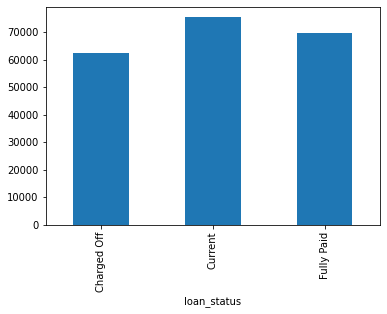

In [13]:
#import the plotting libraries
import matplotlib.pyplot as plt
%matplotlib inline
df1.groupby(['loan_status'])['annual_inc'].mean().plot.bar()
#dont make sense could be outliers in annual inc so mean

<AxesSubplot:xlabel='loan_status'>

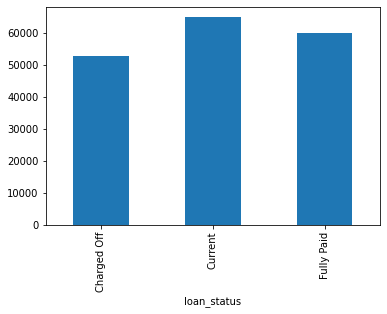

In [14]:
df1.groupby(['loan_status'])['annual_inc'].median().plot.bar()


<AxesSubplot:>

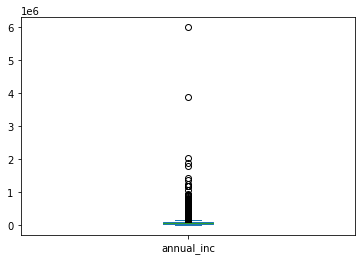

In [15]:
df1.annual_inc.plot.box()

In [16]:
df1.annual_inc.describe()

count    3.971700e+04
mean     6.896893e+04
std      6.379377e+04
min      4.000000e+03
25%      4.040400e+04
50%      5.900000e+04
75%      8.230000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

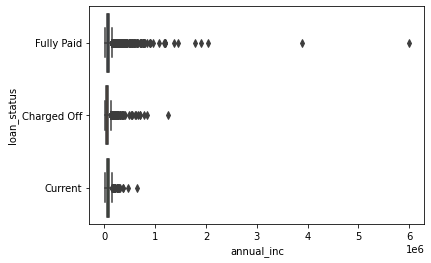

In [17]:
import seaborn as sns
sns.boxplot(df1.annual_inc,df1.loan_status)
plt.show()

In [18]:
df1.dtypes


id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
term                           object
int_rate                       object
installment                   float64
grade                          object
sub_grade                      object
emp_title                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
loan_status                    string
pymnt_plan                     object
url                            object
desc                           object
purpose                        object
title                          object
zip_code                       object
addr_state                     object
dti                           float64
delinq_2yrs                     int64
earliest_cr_

In [19]:
df1['incomeRange']=pd.qcut(df1.annual_inc,[0,0.2,0.4,0.6,0.8,1],["VL","L","M","H","VH"])

In [20]:
df1.incomeRange.value_counts()


H     8132
L     7987
VL    7969
M     7874
VH    7755
Name: incomeRange, dtype: int64

In [21]:

#loan_status of different incomegroup over median loan amount
res=pd.pivot_table(data=df1,index="loan_status",columns ="incomeRange",values="loan_amnt",aggfunc=lambda x: np.quantile(x,0.5))

<AxesSubplot:xlabel='incomeRange', ylabel='loan_status'>

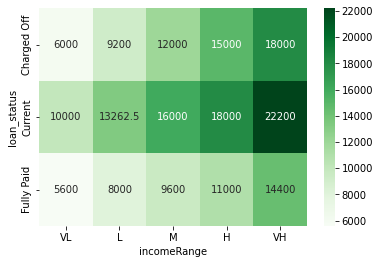

In [22]:
##Apply customisations
sns.heatmap(res,cmap="Greens",annot=True,fmt='g')

In [23]:
#The median of the loan_Amount charged off increase with income range


In [24]:
#loan_status for different purpose over median loan amount
resp=pd.pivot_table(data=df1,index="purpose",columns ="loan_status",values="loan_amnt",aggfunc=lambda x: np.quantile(x,0.5))

<AxesSubplot:xlabel='loan_status', ylabel='purpose'>

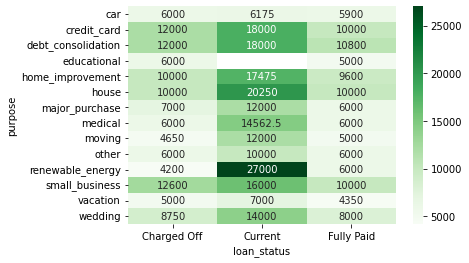

In [25]:
sns.heatmap(resp,cmap="Greens",annot=True,fmt='g')

In [26]:
# The loan_amount taken for creditcard,debt_consolidation,small_business are among the top defaulted ones


In [27]:
resa=pd.pivot_table(data=df1,index="purpose",columns ="incomeRange",values="loan_amnt",aggfunc=lambda x: np.quantile(x,0.5))

<AxesSubplot:xlabel='incomeRange', ylabel='purpose'>

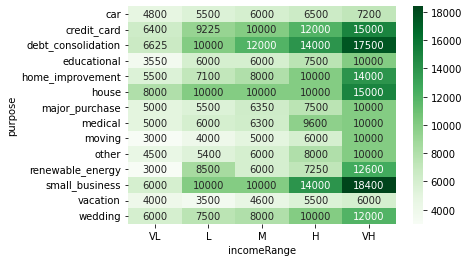

In [28]:
sns.heatmap(resa,cmap="Greens",annot=True,fmt='g')

In [29]:
#This shows the highest loan amount taken for different purpose among different categories
#VeryHigh income group takes for smallbusiness,veryLow for house,Medium for debtconsolidation

<AxesSubplot:xlabel='purpose,loan_status'>

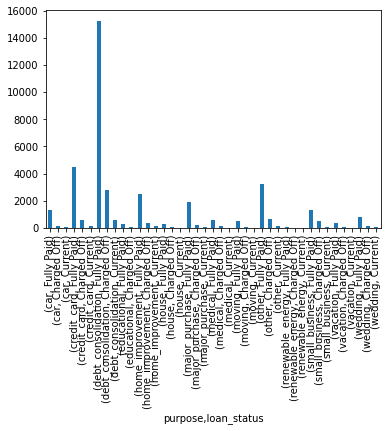

In [30]:
df1.groupby(['purpose'])['loan_status'].value_counts().plot.bar()
#The largest number of loan is taken for debt_consolidation

In [31]:
df1.dtypes

id                               int64
member_id                        int64
loan_amnt                        int64
funded_amnt                      int64
funded_amnt_inv                float64
term                            object
int_rate                        object
installment                    float64
grade                           object
sub_grade                       object
emp_title                       object
emp_length                      object
home_ownership                  object
annual_inc                     float64
verification_status             object
issue_d                         object
loan_status                     string
pymnt_plan                      object
url                             object
desc                            object
purpose                         object
title                           object
zip_code                        object
addr_state                      object
dti                            float64
delinq_2yrs              

In [32]:
dfdelinq=df1[['id','loan_amnt','loan_status','delinq_2yrs','mths_since_last_delinq','acc_now_delinq','chargeoff_within_12_mths','incomeRange','delinq_amnt','grade']]
dfdelinq.head()

,id,loan_amnt,loan_status,delinq_2yrs,mths_since_last_delinq,acc_now_delinq,chargeoff_within_12_mths,incomeRange,delinq_amnt,grade
0,1077501,5000,Fully Paid,0,NaN,0,0.0,VL,0,B
1,1077430,2500,Charged Off,0,NaN,0,0.0,VL,0,C
2,1077175,2400,Fully Paid,0,NaN,0,0.0,VL,0,C
3,1076863,10000,Fully Paid,0,35.0,0,0.0,L,0,C
4,1075358,3000,Current,0,38.0,0,0.0,H,0,B


In [33]:
dfdelinq.dtypes

id                             int64
loan_amnt                      int64
loan_status                   string
delinq_2yrs                    int64
mths_since_last_delinq       float64
acc_now_delinq                 int64
chargeoff_within_12_mths     float64
incomeRange                 category
delinq_amnt                    int64
grade                         object
dtype: object

In [34]:
dfdelinq.mths_since_last_delinq.value_counts()

0.0      443
15.0     252
30.0     247
23.0     247
24.0     241
        ... 
89.0       1
107.0      1
85.0       1
97.0       1
95.0       1
Name: mths_since_last_delinq, Length: 95, dtype: int64

In [35]:
dfdelinq.delinq_2yrs.value_counts()

0     35405
1      3303
2       687
3       220
4        62
5        22
6        10
7         4
8         2
9         1
11        1
Name: delinq_2yrs, dtype: int64

In [36]:
dfdelinq.acc_now_delinq.value_counts()

0    39717
Name: acc_now_delinq, dtype: int64

In [37]:
dfdelinq.mths_since_last_delinq.isnull().sum()

25682

In [38]:
dfdelinq=dfdelinq[~dfdelinq.mths_since_last_delinq.isnull()]
dfdelinq.dtypes

id                             int64
loan_amnt                      int64
loan_status                   string
delinq_2yrs                    int64
mths_since_last_delinq       float64
acc_now_delinq                 int64
chargeoff_within_12_mths     float64
incomeRange                 category
delinq_amnt                    int64
grade                         object
dtype: object

In [39]:
dfdelinq.grade.value_counts()

B    3908
C    3526
D    2614
A    1835
E    1407
F     570
G     175
Name: grade, dtype: int64

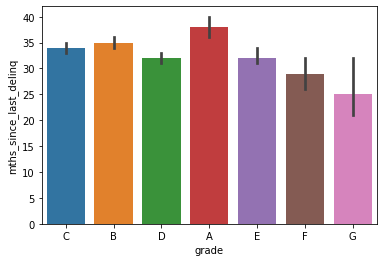

In [40]:
sns.barplot(data=dfdelinq,x='grade',y='mths_since_last_delinq',estimator =np.median)
plt.show()

In [41]:
#People in low risk A,B,C,D does not have much delinques in last months.Their mths_since_last_delinq tend to be higher

<AxesSubplot:xlabel='grade'>

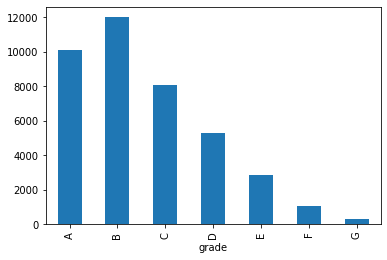

In [42]:
df1.groupby(['grade'])['loan_status'].count().plot.bar()

In [43]:
#Chance of getting loan of high risk group is minimal. 'A' grade loans represent the lowest risk while 'E' grade loans are the riskiest.

<AxesSubplot:xlabel='grade'>

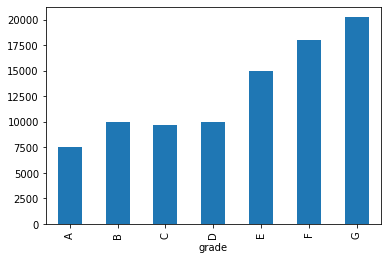

In [44]:
df1.groupby(['grade'])['loan_amnt'].median().plot.bar()

In [45]:
#The median amount of loan taken by high risk group will be higher

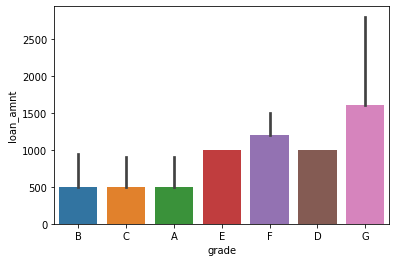

In [46]:
sns.barplot(data=df1,x='grade',y='loan_amnt',estimator =np.min)
plt.show()

In [47]:
resg=pd.pivot_table(data=df1,index="purpose",columns ="grade",values="loan_amnt",aggfunc=lambda x: np.quantile(x,0.5))

<AxesSubplot:xlabel='grade', ylabel='purpose'>

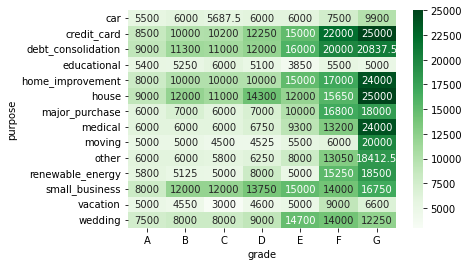

In [48]:
sns.heatmap(resg,cmap="Greens",annot=True,fmt='g')

In [ ]:
#High risk group needs loan more for credit_Card,medical,home_improvement purposes